Imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv('Heart.csv',delimiter=",")

In [6]:
dataset.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [7]:
dataset.shape

(1319, 9)

In [8]:
dataset.dtypes

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

In [9]:
dataset.nunique()

Age                          75
Gender                        2
Heart rate                   79
Systolic blood pressure     116
Diastolic blood pressure     73
Blood sugar                 244
CK-MB                       700
Troponin                    352
Result                        2
dtype: int64

In [10]:
dataset.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

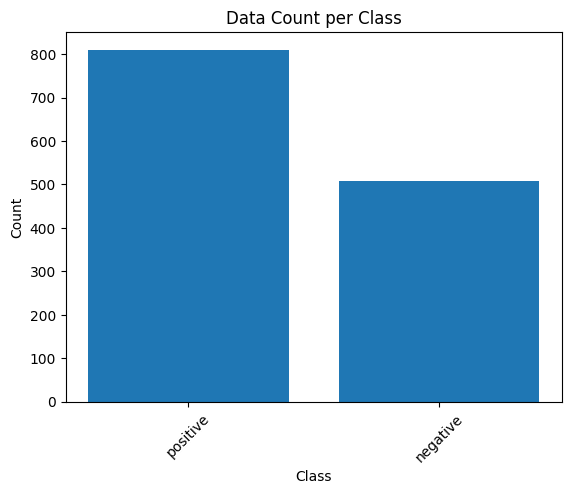

In [12]:
class_counts = dataset['Result'].value_counts()

# Plotting the data count per class
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Count per Class')
plt.xticks(rotation=45)
plt.show()

In [13]:
print(f"There are {dataset.duplicated().sum()} Duplicated lines in your dataset")

There are 0 Duplicated lines in your dataset


Removing ID Column


In [14]:
Y = dataset['Result'] # Target or the labels we want to predict
X = dataset.drop('Result',axis=1) # Collection of text


In [15]:
Y.dtype

dtype('O')

In [16]:
X.dtypes

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
dtype: object

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [18]:
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV


from sklearn.linear_model import LogisticRegression

In [19]:
models = [
    GaussianNB(),
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier()
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, Y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

c:\Users\Wickkid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Wickkid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

,model_name,fold_idx,accuracy
0,GaussianNB,0,0.882576
1,GaussianNB,1,0.681818
2,GaussianNB,2,0.685606
3,GaussianNB,3,0.617424
4,GaussianNB,4,0.653992
5,LogisticRegression,0,0.780303
6,LogisticRegression,1,0.772727
7,LogisticRegression,2,0.780303
8,LogisticRegression,3,0.787879
9,LogisticRegression,4,0.806084


In [20]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
DecisionTreeClassifier,0.987118,0.008717
GaussianNB,0.704283,0.103339
KNeighborsClassifier,0.630801,0.016317
LogisticRegression,0.785459,0.012713


In [21]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
calibrated_svc = CalibratedClassifierCV(estimator=model,
                                        cv="prefit")

calibrated_svc.fit(X_train,y_train)
predicted = calibrated_svc.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))

0.9939393939393939


In [22]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test,y_pred,labels=['negative','positive'],target_names= dataset['Result'].unique()))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

    negative       0.99      0.99      0.99       136
    positive       0.99      0.99      0.99       194

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330



In [25]:
from sklearn.model_selection import learning_curve
import numpy as np
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure()
    plt.title('Learning Curve')
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

    plt.show()


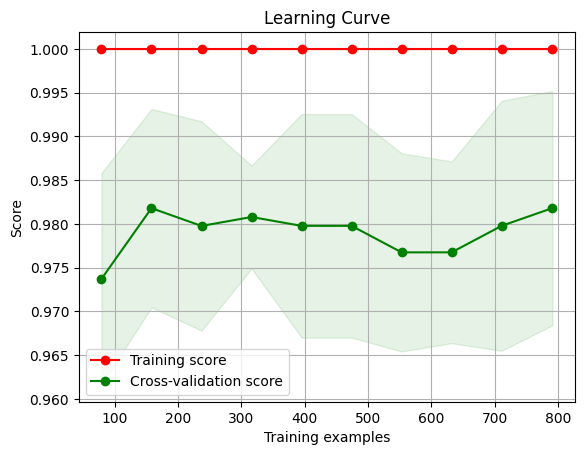

In [26]:
plot_learning_curve(model, X_train, y_train)

In [30]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(estimator, X, y, param_name, param_range):
    train_scores, val_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range, cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure()
    plt.title('Validation Curve')
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.grid()

    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=2)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=2)
    plt.semilogx(param_range, val_scores_mean, label="Cross-validation score",
                 color="navy", lw=2)
    plt.fill_between(param_range, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.2,
                     color="navy", lw=2)

    plt.legend(loc="best")

    plt.show()

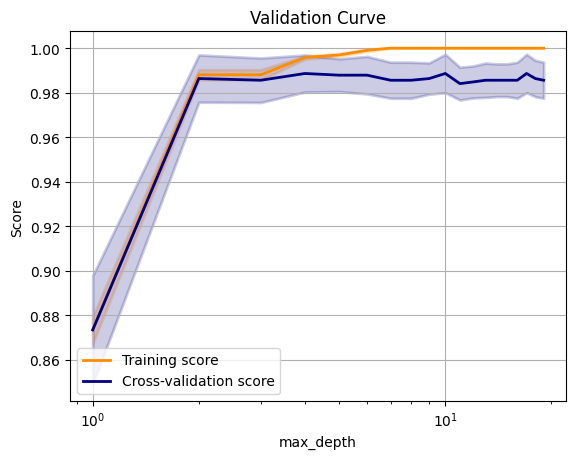

In [39]:
plot_validation_curve(model,X,Y,"max_depth",(range(1, 1200001)))